# Setup

In [1]:
# imports
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [4]:
# get segmented df from other notebook
%store -r rfm_segments_df
rfm_df = rfm_segments_df.copy()
display(rfm_df.head())

,recency,frequency,monetary,segment
customer_id,,,,
1,183,3,118711.78,0
2,213,2,100306.58,1
3,188,4,119028.73,0
4,441,3,142874.25,0
5,132,4,120783.07,0


# Describe Segments
---

## Analysis: Update Segment Labels

**Segment 0 <ins>(Potential Loyalists)**</ins>--> largest segment with 56.52% of customers and makes up largest portion of revenue with 60.28% of total revenue
- ***Monetary:*** <ins>above average</ins> (averaging $109,449.61 total spend)--> between 50th and 75th percentile
- ***Frequency:*** <ins>mid to slightly above average</ins> (averaging 3.3 orders per customer)--> around 50th and 75th percentile
- ***Recency:*** <ins>above average</ins> (averaging 125 days since last purchase)--> between 25th and 50th percentile--lower is better here

**Segment 1 <ins>(Hibernating)**</ins>--> second largest segment with 41.30% of customers and makes up only 24.44% of total revenue
- ***Monetary:*** <ins>significantly below average</ins> (averaging $60,734.61 total spend)--> below 25th percentile
- ***Frequency:*** <ins>below average</ins> (averaging 2.13 orders per customer)--> around 25th percentile
- ***Recency:*** <ins>significantly below average</ins> (averaging 284 days since last purchase)--> greater than 75th percentile

**Segment 2 <ins>(Champions)**</ins>--> very small segment with only 2.17% of customers yet makes up 15.28% of total revenue
- ***Monetary:*** <ins>significantly above average</ins> (averaging $721,462.27 total spend)--> above 75th percentile
- ***Frequency:*** <ins>significantly above average</ins> (averaging 19.5 orders per customer)--> above 75th percentile
- ***Recency:*** <ins>significantly above average</ins> (averaging 34.5 days since last purchase)--> less than 25th percentile

In [ ]:
# update segment labels
segment_labels_dict = {
    0: 'Potential Loyalist',
    1: 'Hibernating',
    2: 'Champion'
}
rfm_df['segment'] = rfm_df['segment'].replace(segment_labels_dict)

rfm_df.head()

,recency,frequency,monetary,segment
customer_id,,,,
1,183,3,118711.78,Potential Loyalist
2,213,2,100306.58,Hibernating
3,188,4,119028.73,Potential Loyalist
4,441,3,142874.25,Potential Loyalist
5,132,4,120783.07,Potential Loyalist


## RFM Distributions

### Overall

In [11]:
# overall
print('OVERALL'.center(53, '-'))
rfm_df.describe()

-----------------------OVERALL-----------------------


,recency,frequency,monetary
count,92.000000,92.000000,92.000000
mean,189.054348,3.152174,102632.819130
std,122.804353,2.626721,100766.634779
min,0.000000,1.000000,9129.350000
25%,101.750000,2.000000,66129.007500
50%,181.000000,3.000000,85360.000000
75%,243.250000,3.000000,115616.882500
max,494.000000,23.000000,795328.220000


### By Segment

In [18]:
# summary stats
cnt = 0
for segment in list(rfm_df.segment.unique()):
    print(f'Segment {cnt}: {segment}'.center(53, '-'))
    display(rfm_df[rfm_df.segment == segment].describe())

    cnt+=1

------------Segment 0: Potential Loyalist------------


,recency,frequency,monetary
count,52.000000,52.000000,52.000000
mean,125.326923,3.269231,109449.610769
std,79.520800,0.629827,32837.714715
min,0.000000,2.000000,52263.900000
25%,66.250000,3.000000,83449.390000
50%,130.500000,3.000000,106080.755000
75%,181.000000,3.250000,123508.627500
max,441.000000,5.000000,200995.410000


----------------Segment 1: Hibernating---------------


,recency,frequency,monetary
count,38.000000,38.000000,38.000000
mean,284.394737,2.131579,60734.607105
std,109.625046,0.474829,24973.588446
min,98.000000,1.000000,9129.350000
25%,208.500000,2.000000,39053.052500
50%,249.000000,2.000000,57525.425000
75%,377.000000,2.000000,77490.360000
max,494.000000,4.000000,117713.560000


-----------------Segment 2: Champion-----------------


,recency,frequency,monetary
count,2.000000,2.000000,2.000000
mean,34.500000,19.500000,721462.265000
std,28.991378,4.949747,104462.235359
min,14.000000,16.000000,647596.310000
25%,24.250000,17.750000,684529.287500
50%,34.500000,19.500000,721462.265000
75%,44.750000,21.250000,758395.242500
max,55.000000,23.000000,795328.220000


## Boxplots

### RFM

##### Recency

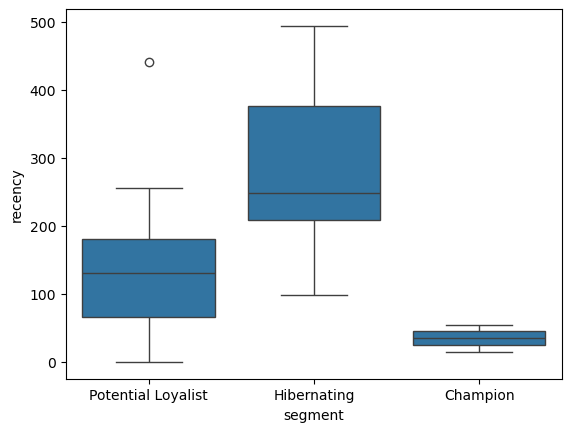

In [19]:
sns.boxplot(x='segment', y='recency', data=rfm_df)
plt.show()

##### Frequency

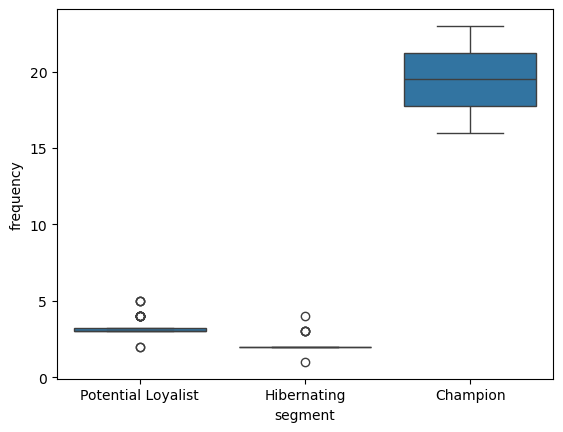

In [20]:
sns.boxplot(x='segment', y='frequency', data=rfm_df)
plt.show()

##### Monetary

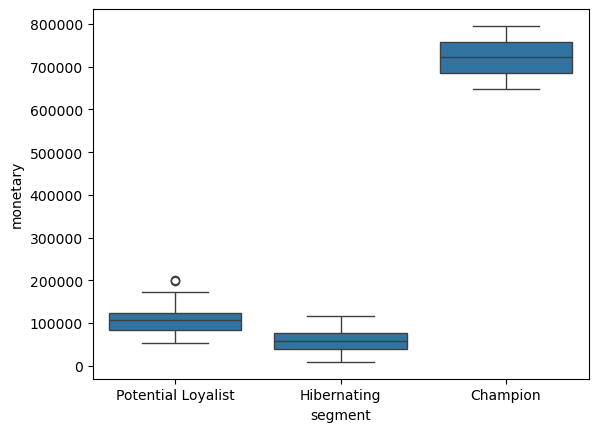

In [21]:
sns.boxplot(x='segment', y='monetary', data=rfm_df)
plt.show()

### Overall

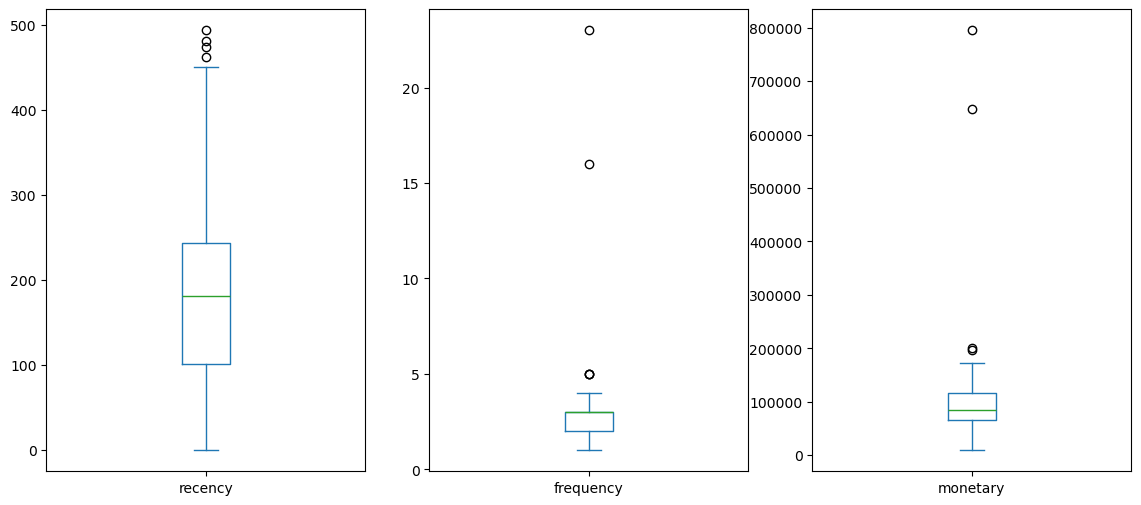

In [16]:
rfm_df.plot(kind='box', subplots=True, figsize=(14,6))
plt.show()

## Pie Charts & Quick Stats

,segment,Recency_mean,Frequency_mean,Monetary_mean,Monetary_total,count
0,Champion,34.500000,19.500000,721462.265000,1442924.53,2
1,Potential Loyalist,125.326923,3.269231,109449.610769,5691379.76,52
2,Hibernating,284.394737,2.131579,60734.607105,2307915.07,38


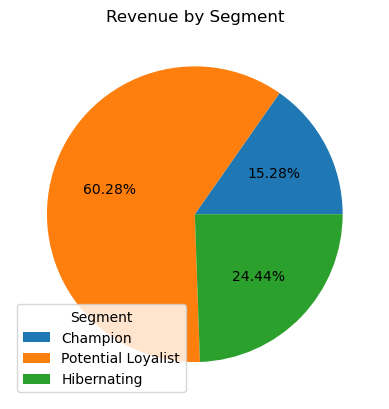

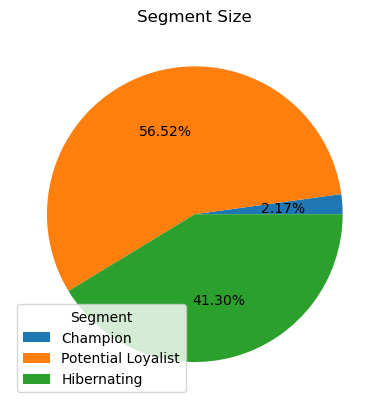

In [38]:
# build summary table of means and revenue/size totals
rfm_cols = ['recency', 'frequency', 'monetary']

segment_summary_df = (
    rfm_df.groupby('segment').agg(
        Recency_mean        = ('recency', 'mean'),
        Frequency_mean      = ('frequency', 'mean'),
        Monetary_mean       = ('monetary', 'mean'),
        Monetary_total      = ('monetary', 'sum'),
        count               = ('segment', 'count')
    ).sort_values('Monetary_mean', ascending=False).reset_index()
)

# ----displays------------------------------
# summary table
display(segment_summary_df)

# pie chart: segments' revenue proportions 
segment_summary_df.plot.pie(
    y='Monetary_total', labels=segment_summary_df['segment'],
    autopct='%1.2f%%', labeldistance=None, ylabel='', title='Revenue by Segment'
    
)
plt.legend(loc='lower left', title='Segment')
plt.show()

# pie chart: segments' proportion of customers
segment_summary_df.plot.pie(
    y='count', labels=segment_summary_df['segment'], 
    autopct='%1.2f%%', labeldistance=None, ylabel='', title='Segment Size'
)
plt.legend(loc='lower left', title='Segment')
plt.show()